In [4]:
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!tar -xf PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: c:\Users\Asus\Desktop\MiniProj2\PersianData.zip

  0%|          | 0.00/7.46k [00:00<?, ?B/s]
100%|██████████| 7.46k/7.46k [00:00<00:00, 380kB/s]


In [104]:
from PIL import Image, ImageDraw
import random
import numpy as np

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 0

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return np.asarray(binary_representation)

In [163]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 2000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for 1.jpg generated and saved as noisy1.jpg
Noisy image for 2.jpg generated and saved as noisy2.jpg
Noisy image for 3.jpg generated and saved as noisy3.jpg
Noisy image for 4.jpg generated and saved as noisy4.jpg
Noisy image for 5.jpg generated and saved as noisy5.jpg


In [190]:
from PIL import Image, ImageDraw
import random

def generateMissingImages():
    # List of image file paths
    image_paths = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missing_image_path = f"miss{i}.jpg"
        getMissingBinaryImage(image_path, missing_image_path)
        print(f"missing image for {image_path} generated and saved as {missing_image_path}")

def getMissingBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    miss_factor = 700
    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(0, 1000)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]
    
            if rand < miss_factor:
                red = 255
                green = 255
                blue = 255
            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")
    # Clean up the drawing tool.
    del draw
    print("ok")
# Generate noisy images and save them
generateMissingImages()


ok
missing image for 1.jpg generated and saved as miss1.jpg
ok
missing image for 2.jpg generated and saved as miss2.jpg
ok
missing image for 3.jpg generated and saved as miss3.jpg
ok
missing image for 4.jpg generated and saved as miss4.jpg
ok
missing image for 5.jpg generated and saved as miss5.jpg


In [144]:
import numpy as np
def similar(noisey_image):
    im = []
    im.append(convertImageToBinary('1.jpg'))
    im.append(convertImageToBinary('2.jpg'))
    im.append(convertImageToBinary('3.jpg'))
    im.append(convertImageToBinary('4.jpg'))
    im.append(convertImageToBinary('5.jpg'))
    difference = []
    for i in range(5):
        difference.append(np.sum(noisey_image != im[i]))
        #print(len((noisey_image != im[i])))
    #print(difference)
    min_diff = 1e9
    min_num = 0
    for i in range(5):
        if difference[i] < min_diff:
            min_diff = difference[i]
            min_num = i
    return min_num


<class 'numpy.ndarray'>


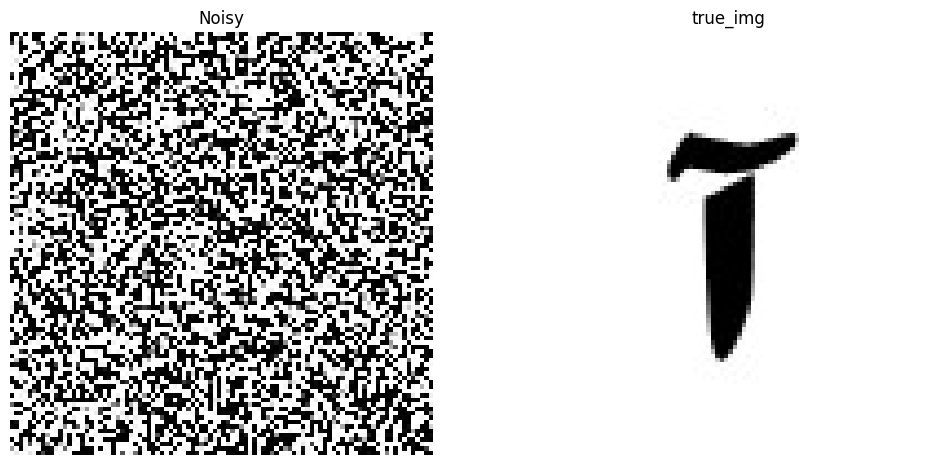

<class 'numpy.ndarray'>


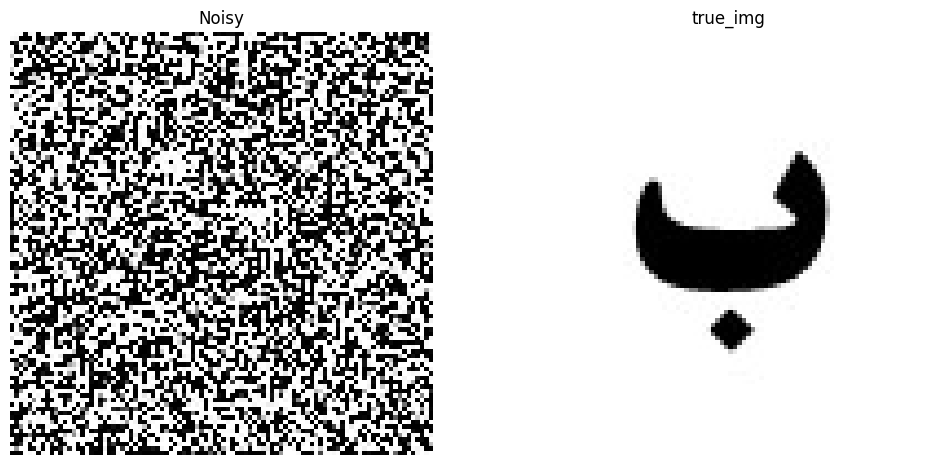

<class 'numpy.ndarray'>


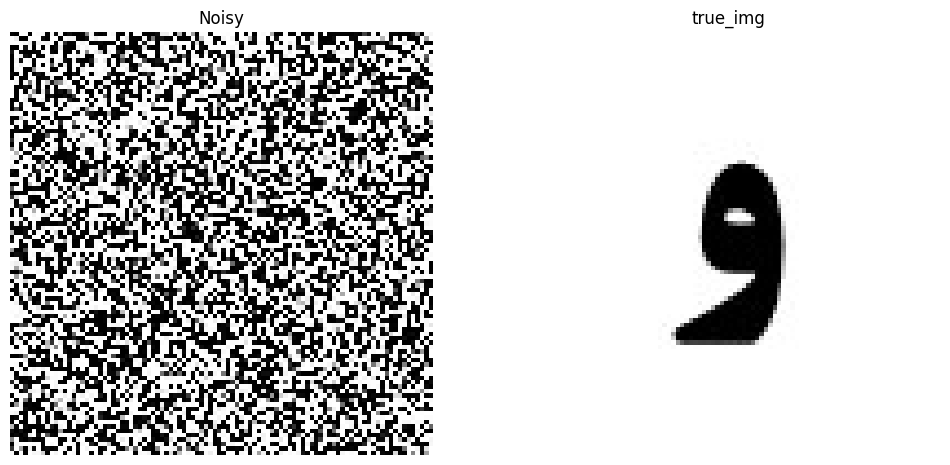

<class 'numpy.ndarray'>


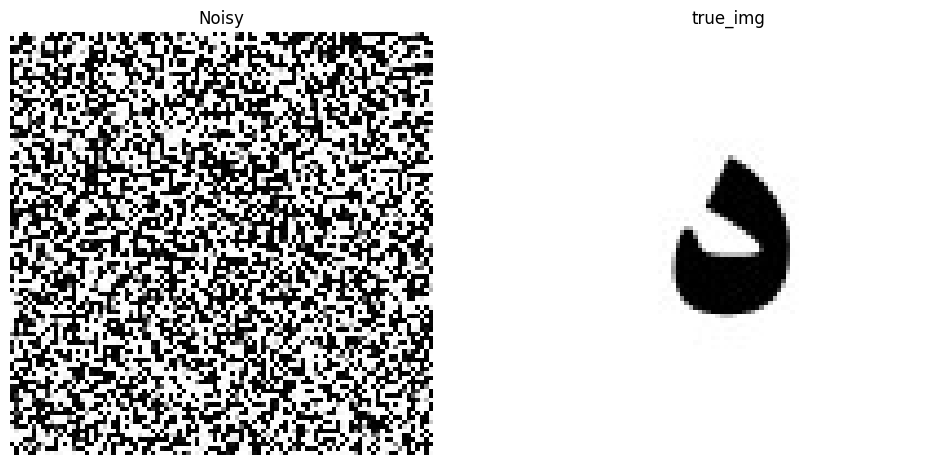

<class 'numpy.ndarray'>


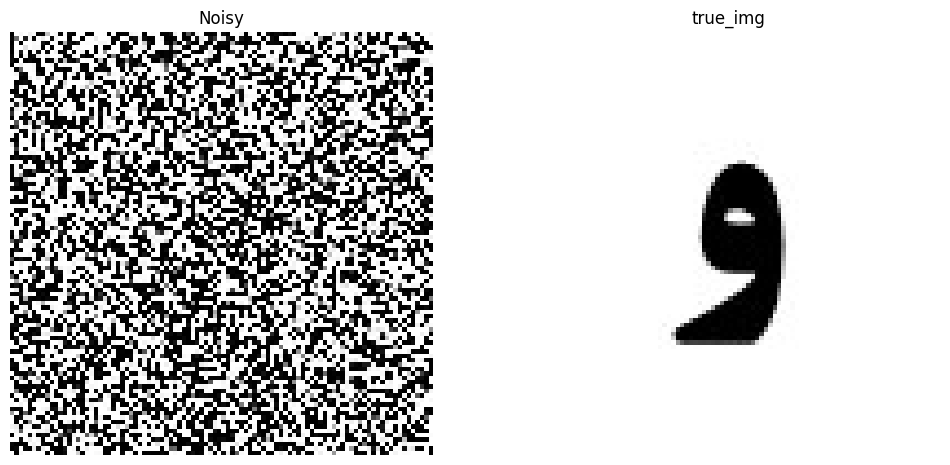

In [164]:
import matplotlib.pyplot as plt

original_images = []
n_images = []
for i in range(5):
    path = f"{i+1}.jpg"
    original_images.append(np.array(Image.open(path).convert('RGB')))
    path = f"noisy{i+1}.jpg"
    n_images.append(np.array(Image.open(path).convert('RGB')))


for i in range(5):
    print(type(convertImageToBinary(f"noisy{i+1}.jpg")))
    ind = similar(convertImageToBinary(f"noisy{i+1}.jpg"))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Noisy")
    plt.imshow(n_images[i])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("true_img")
    plt.imshow(original_images[ind])
    plt.axis('off')
    plt.show()


<class 'numpy.ndarray'>


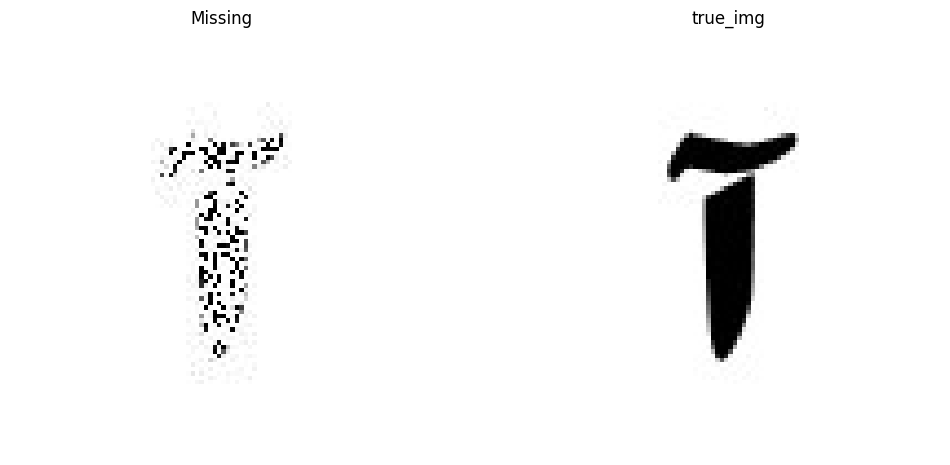

<class 'numpy.ndarray'>


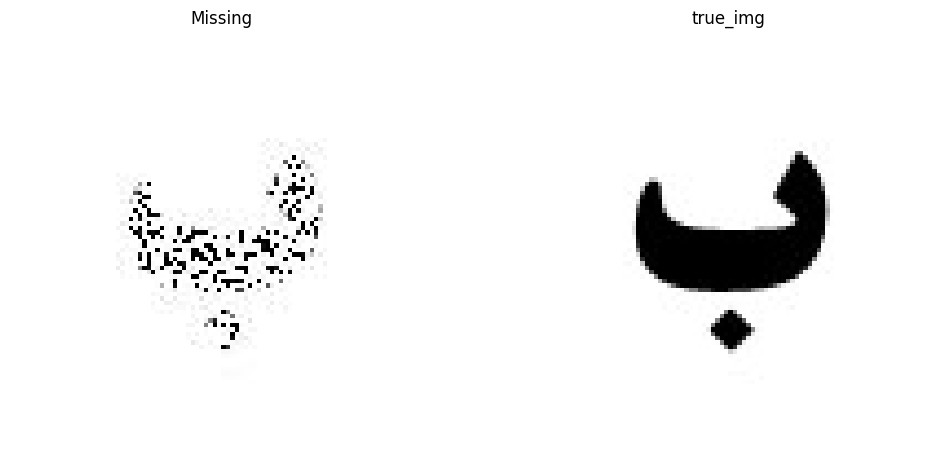

<class 'numpy.ndarray'>


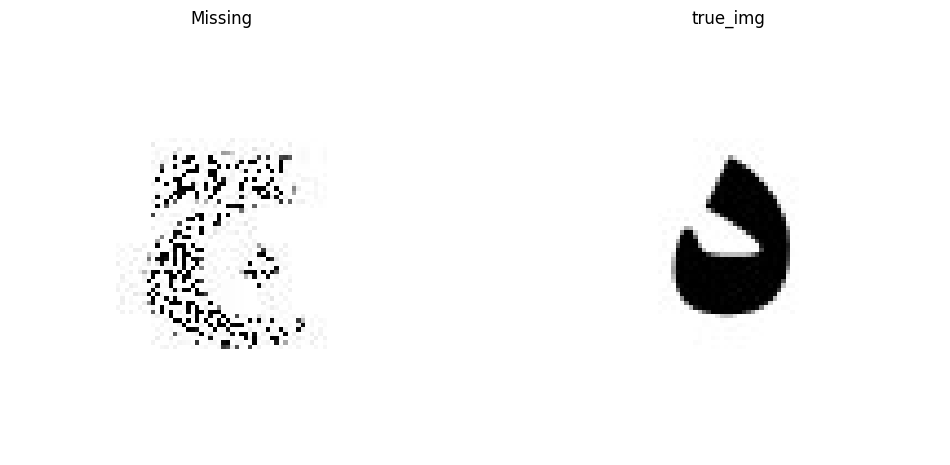

<class 'numpy.ndarray'>


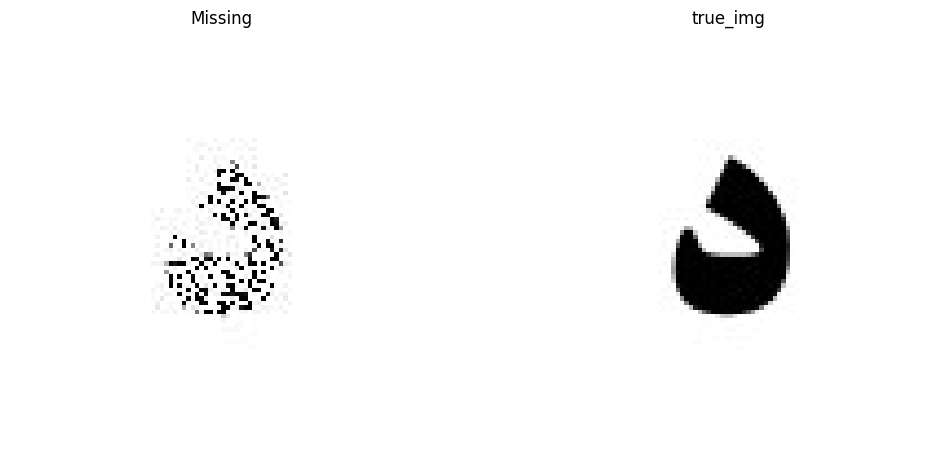

<class 'numpy.ndarray'>


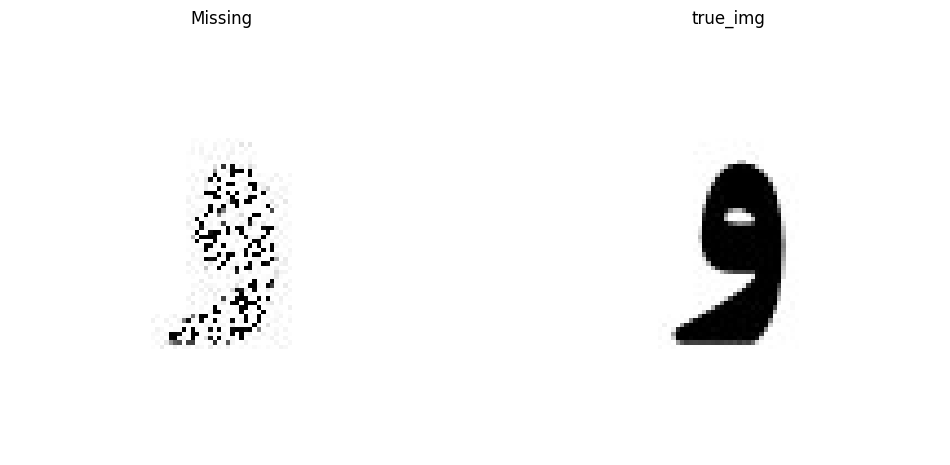

In [191]:
import matplotlib.pyplot as plt

original_images = []
m_images = []
for i in range(5):
    path = f"{i+1}.jpg"
    original_images.append(np.array(Image.open(path).convert('RGB')))
    path = f"miss{i+1}.jpg"
    m_images.append(np.array(Image.open(path).convert('RGB')))


for i in range(5):
    print(type(convertImageToBinary(f"miss{i+1}.jpg")))
    ind = similar(convertImageToBinary(f"miss{i+1}.jpg"))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Missing")
    plt.imshow(m_images[i])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("true_img")
    plt.imshow(original_images[ind])
    plt.axis('off')
    plt.show()
